In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
data = pd.read_csv("/home/prasun/GitDemo/Learning_Deep_Learning/Lesson9/Customer_Churn_Dataset.xls")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [76]:
#Customer ID is irrelevant, Let's drop it
data.drop(labels=["customerID"],axis="columns",inplace= True)
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [77]:
#Target Labels
data.Churn.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [78]:
#Total Charges- object??
data.TotalCharges.describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [79]:
data.TotalCharges.values #ndarray

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [80]:
#Changing the datatype
#data.astype({"TotalCharges":"float64"}).dtypes ## Error is due to missing values
pd.to_numeric(data.TotalCharges, errors='coerce') #Missing Values are treated as NA

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [81]:
data[pd.to_numeric(data.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [82]:
#Integer Location
data.iloc[[488,753,936,1082,1340]]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No


In [83]:
# How Many Rows to be dropped
pd.to_numeric(data.TotalCharges, errors='coerce').isnull().shape, data.shape

((7043,), (7043, 20))

In [84]:
#dropping Null Values
data1 = data[data.TotalCharges != " "]
data1.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [85]:
#Repeating the Type Casting again to chechk if it gives any error message
data1.TotalCharges = pd.to_numeric(data1.TotalCharges)

/tmp/ipykernel_3648/2647228278.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.TotalCharges = pd.to_numeric(data1.TotalCharges)


In [86]:
# Type Casting Successful
data1.TotalCharges.dtypes

dtype('float64')

In [87]:
data1.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

<Axes: >

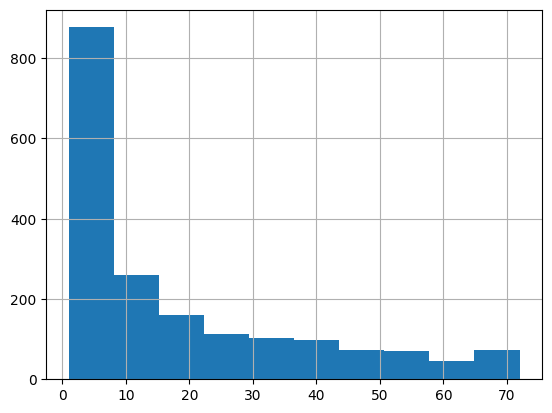

In [88]:
# Customer Retention accross Loyality
data1[data1.Churn != "No"].tenure.hist()

<Axes: >

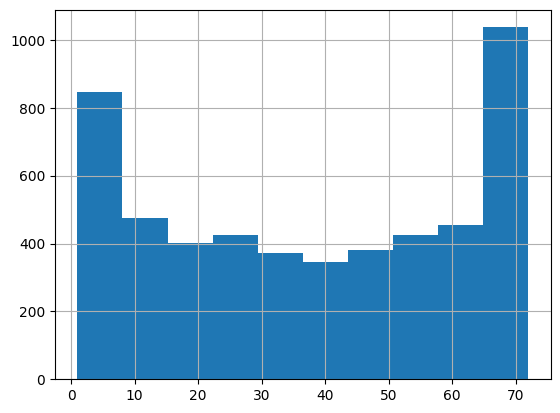

In [89]:
# Customer Churn accross Loyality
data1[data1.Churn == "No"].tenure.hist()

In [90]:
# Fetching Traing Set to Carryout Exploration
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data1.drop(["Churn"],axis="columns"),data1.Churn)

In [91]:
df = pd.concat([X_train,y_train],axis=1)
df_train = pd.DataFrame(df,columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'])

In [92]:
df_train.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1783,Male,0,No,Yes,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,71.65,71.65,Yes
1887,Female,0,No,No,16,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Electronic check,72.65,1194.30,Yes
1745,Female,0,Yes,Yes,56,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.80,1119.90,No


In [93]:
# Figuring Out Customer Churn over `tenure`
df_train[df_train.Churn == "No"].shape,df_train[df_train.Churn == "Yes"].shape,

((3877, 20), (1397, 20))

array([[<Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'tenure'}>],
       [<Axes: title={'center': 'MonthlyCharges'}>,
        <Axes: title={'center': 'TotalCharges'}>]], dtype=object)

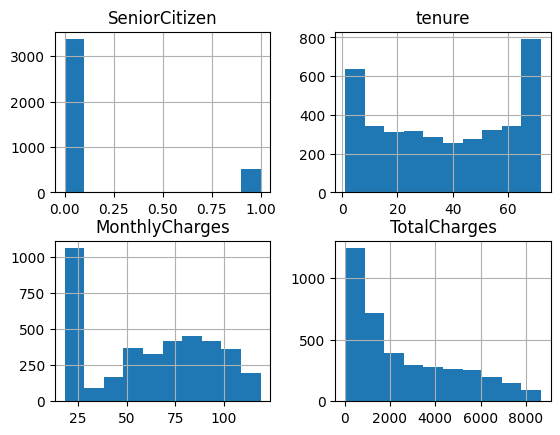

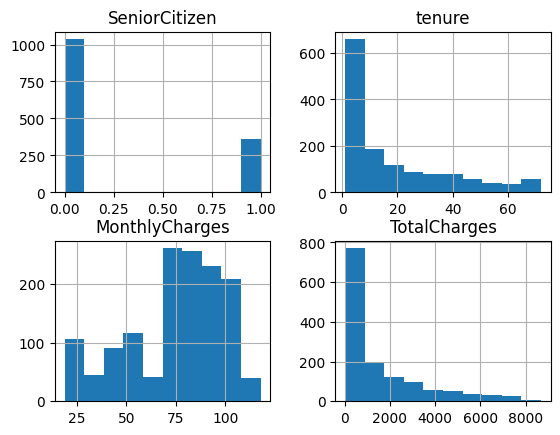

In [94]:
#Histograms along various numeric fields 
df_train[df_train.Churn == "No"].hist()
df_train[df_train.Churn == "Yes"].hist()

#### Insight:
- Seemingly `tenure` and `MonthlyCharges` are two of the most impactful features

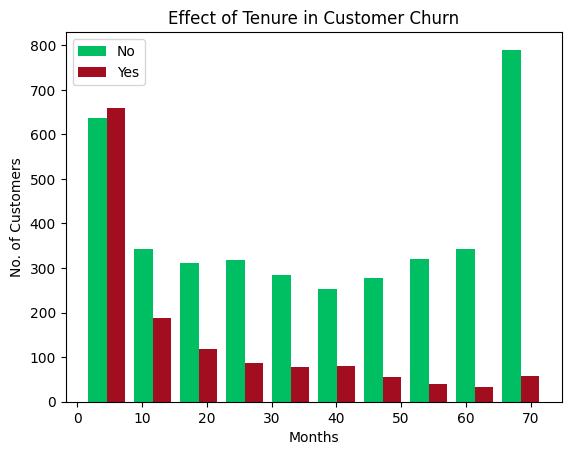

In [95]:
# Let's Visualize Tenure of both Churned/Retained Customers Side-by-side
x0 = df_train.tenure[df_train.Churn == "No"]
x1 = df_train.tenure[df_train.Churn == "Yes"]

plt.Figure(figsize=(5,3))
plt.xlabel("Months")
plt.ylabel("No. of Customers")
plt.title("Effect of Tenure in Customer Churn")
plt.hist([x0,x1],color=(["#00bf63","#a20e20"]), label=["No","Yes"])
plt.legend()

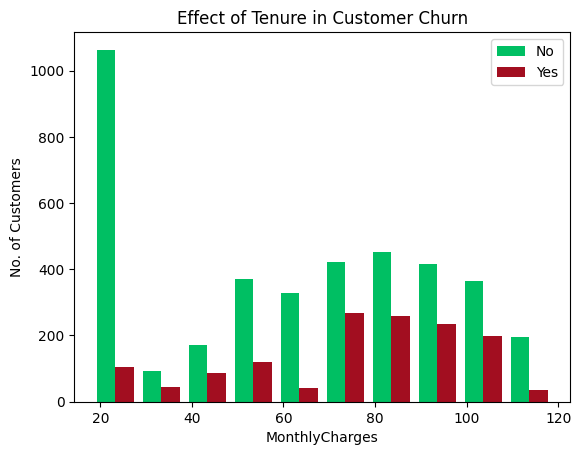

In [96]:
#Let's Do it the same for MonthlyCharges
x0 = df_train.MonthlyCharges[df_train.Churn == "No"]
x1 = df_train.MonthlyCharges[df_train.Churn == "Yes"]

plt.Figure(figsize=(5,3))
plt.xlabel("MonthlyCharges")
plt.ylabel("No. of Customers")
plt.title("Effect of Tenure in Customer Churn")
plt.hist([x0,x1],color=(["#00bf63","#a20e20"]), label=["No","Yes"])
plt.legend()

In [97]:
#let's have unique values from each column as Function
def unq_val(df_train):
    for column in df_train:
        if df_train[column].dtypes == "object":
            print(f"{column}: {df_train[column].unique()}")

In [98]:
#Let's exaine the unique values
unq_val(data1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [99]:
# Let's replace redundant fields
data1.replace('No phone service',"No",inplace= True)
data1.replace('No internet service','No',inplace= True)
unq_val(data1) 

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


/tmp/ipykernel_3648/1640973077.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.replace('No phone service',"No",inplace= True)
/tmp/ipykernel_3648/1640973077.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.replace('No internet service','No',inplace= True)


In [100]:
#Find out columns having Only two categories
col2 = []

for col in data1.columns:
    if len(data1[col].unique()) == 2 and "Yes" in df_train[col].unique():
        col2.append(col)
col2

['Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'Churn']

In [101]:
for col in col2:
    data1[col].replace({"Yes":1,"No":0},inplace = True)

/tmp/ipykernel_3648/1757319259.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data1[col].replace({"Yes":1,"No":0},inplace = True)
/tmp/ipykernel_3648/1757319259.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data1[col].replace({"Yes":1,"No":0},inplace = True)
/tmp/ipykernel_3648/1757319259

In [102]:
unq_val(data1) 

gender: ['Female' 'Male']
InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [103]:
for col in col2:
    print(f"{col}: {data1[col].unique()}")

Partner: [1 0]
Dependents: [0 1]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
PaperlessBilling: [1 0]
Churn: [0 1]


In [104]:
# Labeling gender column
data1["gender"].replace({"Male":0,"Female":1},inplace = True)
data1["gender"].unique()

/tmp/ipykernel_3648/1769735225.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data1["gender"].replace({"Male":0,"Female":1},inplace = True)
/tmp/ipykernel_3648/1769735225.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data1["gender"].replace({"Male":0,"Female":1},inplace = True)
/tmp/ipyke

array([1, 0])

In [105]:
# Creating Dummy Variables
df1 = pd.get_dummies(data= data1,columns=["InternetService","Contract","PaymentMethod"],drop_first=True, dtype=float)
df2 = pd.get_dummies(data= data1,columns=["InternetService","Contract","PaymentMethod"], dtype=float)
df1.shape, df2.shape

((7032, 24), (7032, 27))

In [106]:
#Checking existing data-types
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                        float64
InternetService_Fiber optic                float64
InternetService_No             

In [107]:
# identify Features to apply scaling on
mx = []
for col in df2.columns:
    r = df2[col].max() - df2[col].min()
    if r >= 3:
        mx.append(col)
print(mx)

['tenure', 'MonthlyCharges', 'TotalCharges']


In [108]:
# Instatiating MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [110]:
# Fit-Transform
df2[mx] = scaler.fit_transform(df2[mx])

In [114]:
# Fetching Traing Set to Carryout Exploration
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df2.drop(["Churn"],axis="columns"),df2.Churn)